In [125]:
import pandas as pd
import yfinance as yf
import datetime, time
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import requests, random

chrome_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.86 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.111 Safari/537.36"
]

firefox_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0",
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0"
]

safari_agents = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_2_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Safari/605.1.15",
    "Mozilla/5.0 (iPhone; CPU iPhone OS 17_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Mobile/15E148 Safari/604.1"
]

edge_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.70 Safari/537.36 Edg/122.0.2365.80",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.105 Safari/537.36 Edg/123.0.2420.53"
]

USER_AGENTS = {
    "chrome": chrome_agents,
    "firefox": firefox_agents,
    "safari": safari_agents,
    "edge": edge_agents
}

session = requests.Session()
session.headers.update({
    "User-Agent": random.choice(random.choice(list(USER_AGENTS.values())))
})

Welcome to the Salisbury Street Capital Project. If you contribute, sign your name here: Dave Bater. George the cat.

Below are two dictionaries containing C POSIX strftime and strptime translations. This can be used to read user inputs and also control data reviewed from yfinance or most other tabular data. Maybe this exists on Wikipedia. Also consider tracking Unix time.

In [58]:
date_formats = [
    {"Code": "%Y", "Meaning": "Year (4 digits)", "Example": "2025"},
    {"Code": "%y", "Meaning": "Year (2 digits)", "Example": "25"},
    {"Code": "%m", "Meaning": "Month (01–12)", "Example": "04"},
    {"Code": "%B", "Meaning": "Month name (full)", "Example": "April"},
    {"Code": "%b", "Meaning": "Month name (abbreviated)", "Example": "Apr"},
    {"Code": "%d", "Meaning": "Day of the month (01–31)", "Example": "09"},
    {"Code": "%j", "Meaning": "Day of the year (001–366)", "Example": "120"},
    {"Code": "%a", "Meaning": "Weekday (abbreviated)", "Example": "Tue"},
    {"Code": "%A", "Meaning": "Weekday (full)", "Example": "Tuesday"},
    {"Code": "%w", "Meaning": "Weekday (0=Sun–6=Sat)", "Example": "2"},
    {"Code": "%U", "Meaning": "Week number (Sun-start, 00–53)", "Example": "17"},
    {"Code": "%W", "Meaning": "Week number (Mon-start, 00–53)", "Example": "17"},
    {"Code": "%x", "Meaning": "Locale date representation", "Example": "04/30/25"},
]
time_formats = [
    {"Code": "%H", "Meaning": "Hour (24-hour, 00–23)", "Example": "14"},
    {"Code": "%I", "Meaning": "Hour (12-hour, 01–12)", "Example": "02"},
    {"Code": "%p", "Meaning": "AM/PM", "Example": "PM"},
    {"Code": "%M", "Meaning": "Minute (00–59)", "Example": "05"},
    {"Code": "%S", "Meaning": "Second (00–59)", "Example": "09"},
    {"Code": "%f", "Meaning": "Microsecond (000000–999999)", "Example": "123456"},
    {"Code": "%Z", "Meaning": "Time zone name", "Example": "UTC"},
    {"Code": "%z", "Meaning": "UTC offset", "Example": "+0000"},
    {"Code": "%X", "Meaning": "Locale time representation", "Example": "14:05:07"},
    {"Code": "%c", "Meaning": "Locale date & time", "Example": "Tue Apr 30 14:05:07 2025"},
    {"Code": "%%", "Meaning": "Literal % character", "Example": "%"},
]

In [59]:
df_date = pd.DataFrame(date_formats)
df_time = pd.DataFrame(time_formats)

In [60]:
df_date.head()

Code                   Meaning Example
0   %Y           Year (4 digits)    2025
1   %y           Year (2 digits)      25
2   %m             Month (01–12)      04
3   %B         Month name (full)   April
4   %b  Month name (abbreviated)     Apr

In [61]:
df_time.head()

Code                Meaning Example
0   %H  Hour (24-hour, 00–23)      14
1   %I  Hour (12-hour, 01–12)      02
2   %p                  AM/PM      PM
3   %M         Minute (00–59)      05
4   %S         Second (00–59)      09

In [62]:
time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

'2025-05-21 01:10:54'

time and datetime are powerful standard libraries for automation. They are not fully enabled in this program but would welcome the skill of a better programmer. The df_date and df_time pandas DataFrames contain universal characters that will facilitate complete control over records displayed in most date time formats.

In [63]:
# pandas display options for better readability. Not sure if they have to be executed in a cell block. May not be necessary.

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
pd.set_option("display.precision", 6)

In [64]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [65]:
tables = pd.read_html(url)
table = tables[0]
symbol_column = table["Symbol"]
ticker_list = []
for ticker in symbol_column:
    ticker_list.append(ticker)

ticker_list = [ticker.replace(".", "-") for ticker in ticker_list] # Wikipedia uses "." in some tickers to denote class A/B shares. Also this is an example of list comprehension.
ticker_list.sort()

In [66]:
start = datetime.datetime(2025, 1, 1).strftime("%Y-%m-%d")
end = datetime.datetime.now().strftime("%Y-%m-%d")

In [67]:
test = yf.download("AAPL", start="2023-01-01", end="2023-12-31")
if test.empty:
    raise Exception("Test download returned empty data.")

[*********************100%***********************]  1 of 1 completed


In [68]:
sp500df = yf.download(ticker_list, start=start, end=end, auto_adjust=False)
sp500df.to_csv("sp500.csv", index=True)
sp500_adj_close = sp500df["Adj Close"]
sp500_adj_close.to_csv("sp500_adj_close.csv", index=True)

[*********************100%***********************]  503 of 503 completed


In [69]:
sp500df = pd.read_csv(r"C:\Users\dbate\Desktop\sp500.csv", index_col=0, parse_dates=True, header=[0,1])
sp500_adj_close = pd.read_csv(r"C:\Users\dbate\Desktop\sp500_adj_close.csv", index_col=0, parse_dates=True)

In [70]:
daily_returns = sp500_adj_close.pct_change().dropna()

In [71]:
fig = go.Figure()

for ticker in daily_returns.columns:
    fig.add_trace(go.Scatter(
        x=daily_returns.index,
        y=daily_returns[ticker],
        mode='lines',
        name=ticker,
        customdata=[[ticker]] * len(daily_returns),
        hovertemplate=(
        "Date: %{x}<br>" +
        "Return: %{y:.4f}<br>" +
        "Ticker: %{customdata[0]}<extra></extra>"
        )
    ))

fig.update_layout(
    title='Daily Returns of S&P 500 Tickers',
    xaxis_title='Date',
    yaxis_title='Daily Return',
    template='plotly_white'
)

fig.show()

In [127]:
user_input_stock_symbol = input("Enter stock symbol to inspect (e.g., 'AAPL', 'MSFT'): ").upper()

high = sp500df["High"][user_input_stock_symbol]

low = sp500df["Low"][user_input_stock_symbol]

volume = sp500df["Volume"][user_input_stock_symbol]

adj_close = sp500df["Adj Close"][user_input_stock_symbol]

ticker = pd.DataFrame({
    "Date": adj_close.index,
    "Price": adj_close.values,
    "High": high.values,
    "Low": low.values,
    "Volume": volume.values
})

ticker["Returns"] = ticker["Price"].pct_change()

ticker.reset_index(drop=True, inplace=True)

ticker.head(10)

Date       Price        High         Low   Volume   Returns
0 2025-01-02   91.980804   93.059998   90.379997  2182400       NaN
1 2025-01-03   97.683113  100.660004   93.449997  2701200  0.061995
2 2025-01-06   97.901291  100.320000   97.989998  4259200  0.002234
3 2025-01-07   95.927795   99.470001   94.839996  3110700 -0.020158
4 2025-01-08   97.722778   99.610001   93.349998  3407500  0.018712
5 2025-01-10   98.565735  100.529999   96.680000  3233100  0.008626
6 2025-01-13   96.393898   98.959999   95.309998  2513600 -0.022034
7 2025-01-14   98.962418  100.599998   97.760002  2894500  0.026646
8 2025-01-15  103.206924  104.919998  102.220001  2737800  0.042890
9 2025-01-16  105.120911  106.650002  103.690002  3465100  0.018545

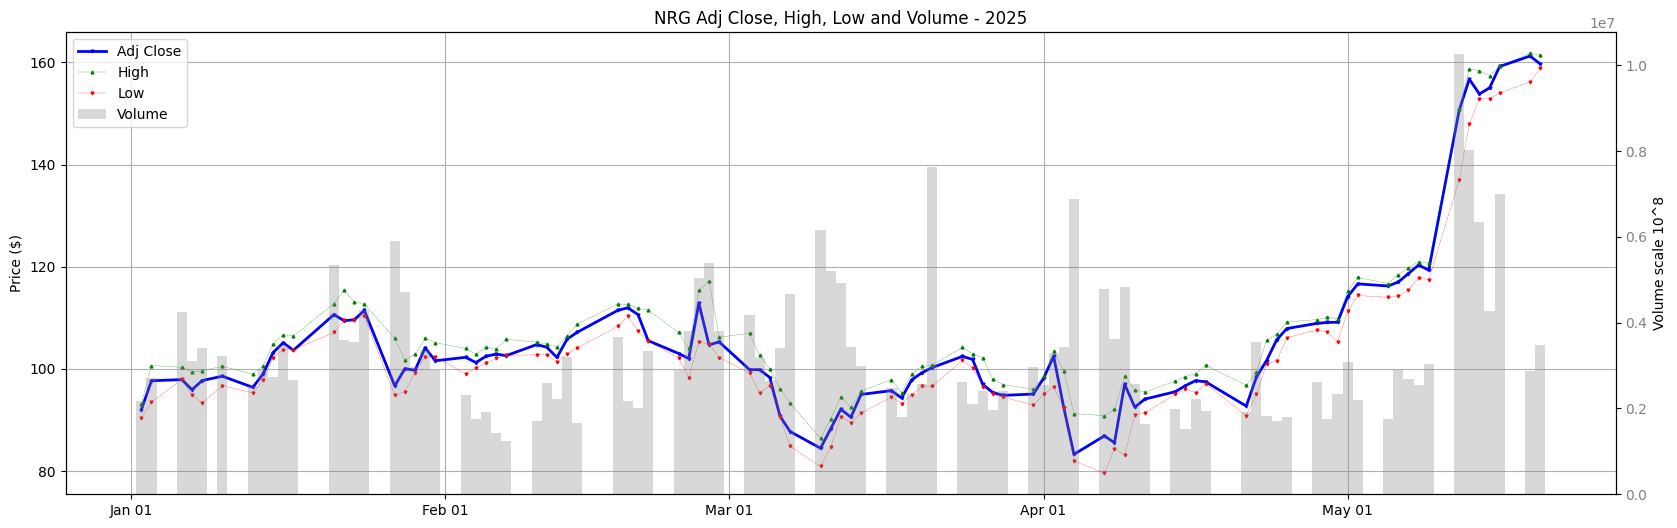

In [128]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(ticker["Date"], ticker["Price"], color='blue', marker='v', markersize=2, linestyle='-', linewidth=2, label='Adj Close')

ax.plot(ticker["Date"], ticker["High"], color='green', marker='^', markersize=2, linestyle='dashed', linewidth=0.25, label='High')

ax.plot(ticker["Date"], ticker["Low"], color='red', marker='v', markersize=2, linestyle='dashed', linewidth=0.25, label='Low')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.set_ylabel("Price ($)")

plt.title(f"{user_input_stock_symbol} Adj Close, High, Low and Volume - 2025")

ax2 = ax.twinx()

ax2.bar(ticker["Date"], ticker["Volume"], color='gray', alpha=0.3, width=1, label='Volume')

ax2.set_ylabel("Volume scale 10^8")

ax2.tick_params(axis='y', labelcolor='gray')

lines_1, labels_1 = ax.get_legend_handles_labels()

lines_2, labels_2 = ax2.get_legend_handles_labels()

ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

ax.grid(True)

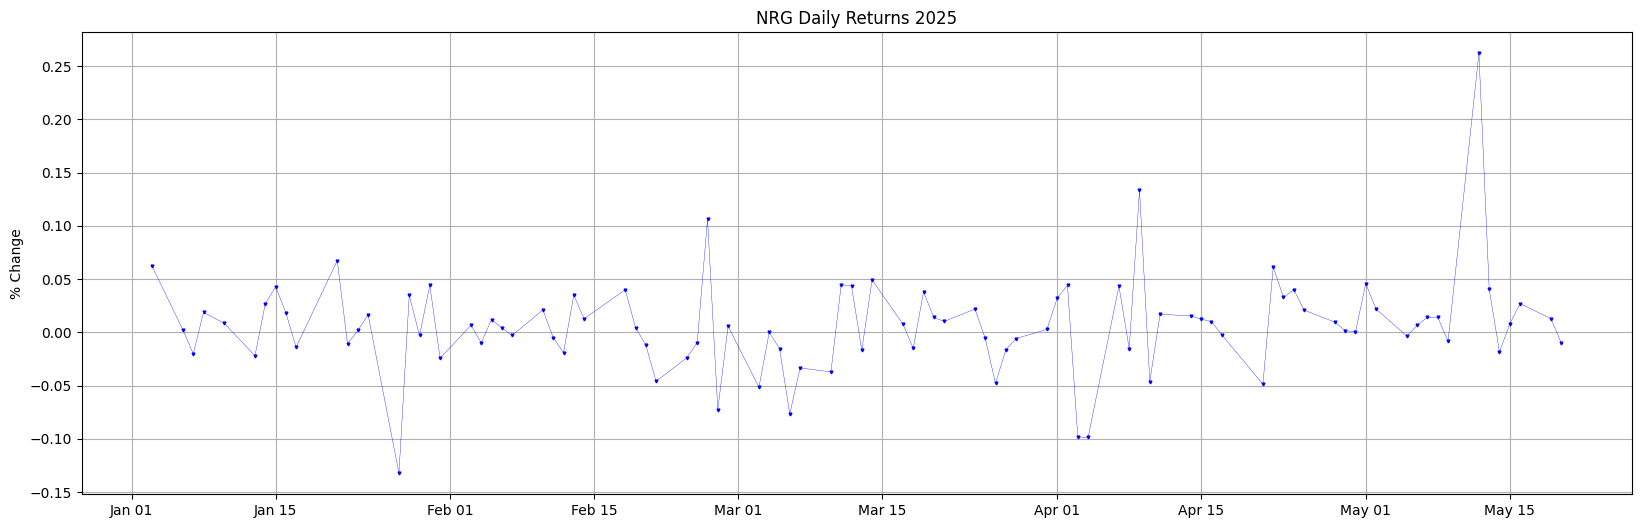

In [129]:
fig,ax = plt.subplots(figsize=(20, 6))

ax.plot(ticker["Date"], ticker["Returns"], color='blue', marker='v', markersize=2, linestyle='-', linewidth=0.25)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.title(f"{user_input_stock_symbol} Daily Returns 2025")

ax.set_ylabel("% Change")

ax.grid(True)

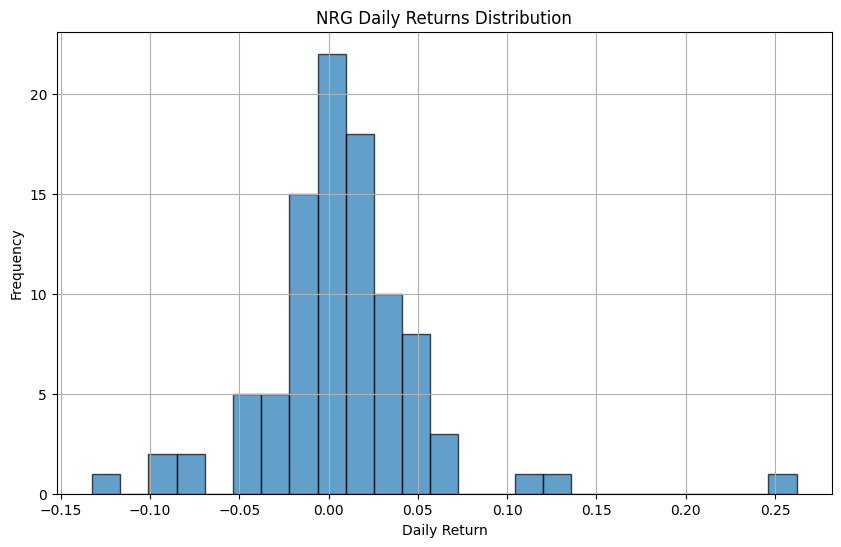

In [132]:
plt.figure(figsize=(10, 6))

plt.hist(ticker["Returns"].dropna(), bins=25, edgecolor='black', alpha=0.7)

plt.title(f"{user_input_stock_symbol} Daily Returns Distribution")

plt.xlabel("Daily Return")

plt.ylabel("Frequency")

plt.grid(True)

In [103]:
avg_daily_returns = pd.DataFrame(daily_returns.mean().sort_values(ascending=False))

avg_daily_returns.reset_index(inplace=True)

avg_daily_returns.columns = ["Ticker", "Avg Daily Return"]

avg_daily_returns_list = avg_daily_returns.head(10).values.tolist()

symbols_of_interest = pd.DataFrame(avg_daily_returns_list)

symbols_of_interest.set_index(0, inplace=True)

symbols_of_interest = symbols_of_interest.index.to_list()
    
symbols_of_interest

avg_daily_returns.head(25)

Ticker  Avg Daily Return
0    PLTR          0.007043
1     NRG          0.006939
2    SMCI          0.006288
3     HWM          0.004654
4     CVS          0.004461
5     MOS          0.004448
6    UBER          0.004415
7      PM          0.004134
8     GEV          0.004093
9      GE          0.003873
10    NEM          0.003686
11     DG          0.003652
12   VRSN          0.003493
13    CEG          0.003492
14   NFLX          0.003477
15   CRWD          0.003224
16   AXON          0.003149
17   PAYC          0.003094
18   TTWO          0.003075
19   PODD          0.003045
20    CAH          0.003037
21    HCA          0.003014
22   MPWR          0.002996
23    COR          0.002979
24    STX          0.002953

In [98]:
cumulative_returns = (1 + daily_returns).cumprod()

final_cumulative_returns = cumulative_returns.iloc[-1].sort_values(ascending=False)

final_cumulative_returns.head(25)

NRG     1.736014
PLTR    1.670302
HWM     1.492310
CVS     1.474797
MOS     1.470751
UBER    1.454330
PM      1.450512
SMCI    1.423295
GE      1.398053
VRSN    1.373017
NEM     1.371136
DG      1.370698
NFLX    1.344287
GEV     1.328799
CAH     1.316222
COR     1.308873
HCA     1.299487
TTWO    1.297318
PAYC    1.296672
PODD    1.274946
CRWD    1.273248
MCK     1.271592
WRB     1.269495
IDXX    1.264914
RSG     1.263389
Name: 2025-05-20 00:00:00, dtype: float64

```python
benchmark_adj_close_true = benchmark_adj_close.drop(columns=["BTC-USD", "^TNX", "NG=F", "CL=F", "GC=F"])

sp500df['Adj Close'].head()
sp500df['High'].head()
sp500df['Low'].head()
sp500df['Close'].head()
sp500df['Volume'].head()
sp500df['Open'].head()
sp500df['Adj Close'].tail()
```
This code is disabled. The next cell looks at benchmarks.

selected_benchmarks = ["SPY", "GC=F", "BTC-USD", "^TNX", "CL=F", "BZ=F", "000001.SS", "NG=F"]

benchmark_adj_close = yf.download(selected_benchmarks, start=start, end=end, auto_adjust=False)["Adj Close"].dropna()

benchmark_adj_close.head()

In [76]:
def market_with_btc():
    fig, ax = plt.subplots(figsize=(20, 6))
    for ticker in benchmark_adj_close.columns:
        ax.plot(
            benchmark_adj_close.index,
            benchmark_adj_close[ticker],
            label=ticker,
            marker='v',
            markersize=2,
            linestyle='-',
            linewidth=0.25
        )
    ax.legend(loc="upper left")
    return fig, ax

benchmark_adj_close_true = benchmark_adj_close.drop(columns=["BTC-USD",'^TNX','NG=F','CL=F','GC=F'])

This project uses 'SPY' and not 'VIX' but it is a fitting companion.

| Ticker      | Asset                    | Currency               |
| ----------- | ------------------------ | ---------------------- |
| `VIX`      | Volatility Index         | USD (implied %)        |
| `GC=F`      | Gold (COMEX Futures)     | USD per troy ounce     |
| `BTC-USD`   | Bitcoin                  | USD                    |
| `^TNX`      | 10-Year Treasury Yield   | % (rate, not a price)  |
| `CL=F`      | WTI Crude Oil Futures    | USD per barrel         |
| `BZ=F`      | Brent Crude Oil Futures  | USD per barrel         |
| `000001.SS` | Shanghai Composite Index | **CNY** (Chinese yuan) |
| `NG=F`      | Natural Gas Futures      | USD per MMBtu          |

In [77]:
benchmark_adj_close_returns = benchmark_adj_close.pct_change()

def market_viewer():
    fig, ax = plt.subplots(figsize=(30, 10))
    for ticker in benchmark_adj_close_returns.columns:
        ax.plot(
            benchmark_adj_close_returns.index,
            benchmark_adj_close_returns[ticker],
            label=ticker,
            marker='v',
            markersize=3,
            linestyle='-',
            linewidth=1.5       )
    ax.legend(loc="upper left")
    return fig, ax

In [78]:
benchmark_adj_close_returns.mean().sort_values(ascending=False)

# create df of fundamentals with .info i think from yf exoirt to csv

Ticker
GC=F         0.002484
BTC-USD      0.001300
000001.SS    0.000503
SPY          0.000340
NG=F         0.000076
^TNX        -0.000221
BZ=F        -0.001794
CL=F        -0.001850
dtype: float64